In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
from numpy import exp, cos, sin, pi
import scipy.fft as dft

In [20]:
a, b, delta = 1, 1, 0.25  # 2, 2, 10000
Nx = 128   #128
Ny = 128   #64

def solve(Nx, Ny, delta, a, b):
    hx, hy = a/Nx, b/Ny
    l = np.zeros(Ny + 1)
    for m in (range(Ny + 1)):
        l[m] = 4 * (sin(pi*(m + 1)/2/Ny))**2

    f = np.zeros([Nx+1, Ny+1])
    for j in (range(Ny+1)):
        for i in range(Nx+1):
            f[i,j] = exp(-((i*hx-a/2)**2 + (j*hy-b/2)**2)/delta**2)

    F = np.zeros([Nx+1, Ny + 1])
    for i in (range(Nx+1)):
        F[i] = dft.dst(f[i], type=1) / 2

    U = np.zeros([Nx+1, Ny + 1])
    for m in (range(Ny + 1)):
        slau = np.zeros([Nx+1, Nx+1])
        right = np.zeros(Nx+1)

        for i in range(1, Nx):
            slau[i,i] = 2/hx**2 + l[m]/hy**2
            slau[i,i-1] = -1/hx**2
            slau[i,i+1] = -1/hx**2
            right[i] = F[i,m]

        slau[0,0] = 1
        slau[0,1] = -1
        right[0] = 0
        slau[-1,-1] = 1
        right[-1] = 0
        sol = np.linalg.solve(slau, right)
        U[:,m] = sol

    u = np.zeros([Nx+1, Ny+1])
    for i in (range(Nx+1)):
        u[i] = dft.idst(U[i], type=1) * 2

    return u


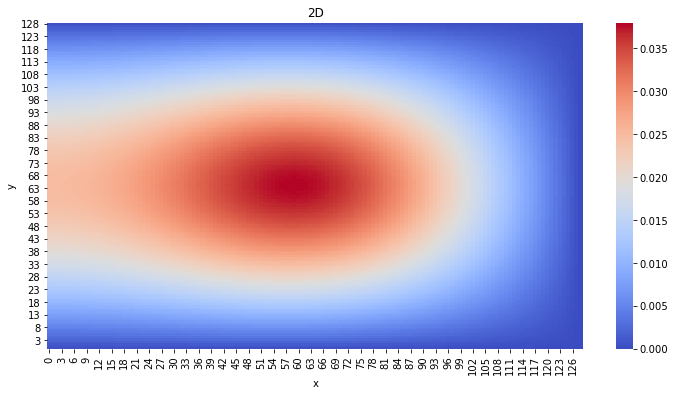

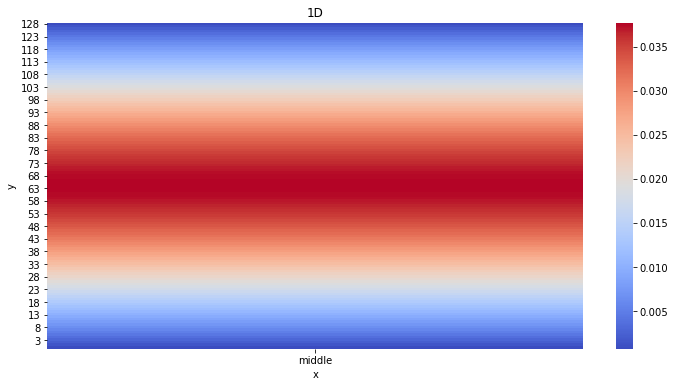

Максимальное значение температуры:  0.038026014510795465
Максимальное значение температуры:  0      0.024912
1      0.024912
2      0.024927
3      0.024958
4      0.025004
         ...   
124    0.002698
125    0.002024
126    0.001350
127    0.000675
128   -0.000000
Length: 129, dtype: float64


In [21]:
fig = plt.figure(figsize=(12,6))
u = solve(Nx, Ny, delta, a, b)
df_u = pd.DataFrame(u.T).iloc[::-1]
ax = sns.heatmap(df_u, cmap = 'coolwarm')
ax.set_title('2D')
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.show()

fig = plt.figure(figsize=(12,6))
df = pd.DataFrame()
df['middle'] = df_u[int(Nx/2)]
ax2 = sns.heatmap(df, cmap = 'coolwarm')
ax2.set_title('1D')
ax2.set_ylabel('y')
ax2.set_xlabel('x')
plt.show()
print('Максимальное значение температуры: ', df_u.max().max())
np.set_printoptions(threshold = sys.maxsize)
print('Максимальное значение температуры: ', df_u.max())